# AutoML

## 055550.KS

In [9]:
import numpy as np
import pandas as pd
from pycaret.time_series import *
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt

In [2]:
def predict_future(file_name):
    # 데이터 불러오기 및 전처리
    stock_data = pd.read_csv(file_name + '.csv')
    stock_data.drop(["Date"], axis=1, inplace=True)
    stock_data = stock_data.dropna()
    
    # 설정 변수
    FH = 14
    target = 'Close'
    exog_vars = ['Open', 'High', 'Low', 'Volume']
    include = [target] + exog_vars
    data = stock_data[include]

    # 실험 설정
    exp_auto = TSForecastingExperiment()
    exp_auto.setup(data=data, target=target, fh=FH, session_id=123, fold=10)

    # 저장된 모델 불러오기
    model_path = os.path.join("model_data", f'{file_name}_total')
    final_auto_model = exp_auto.load_model(model_path)

    # 외생 변수를 위한 최적 모델 찾기 및 예측
    exog_exps, exog_models = [], []
    for exog_var in exog_vars:
        exog_exp = TSForecastingExperiment()
        exog_exp.setup(data=data[exog_var], target=exog_var, fh=FH, session_id=123, fold = 10)
        model_path = os.path.join("model_data", f'{file_name}_{exog_var}')
        final_exog_model = exog_exp.load_model(model_path)
        exog_exps.append(exog_exp)
        exog_models.append(final_exog_model)

    future_exog = pd.concat([exog_exp.predict_model(exog_model) for exog_exp, exog_model in zip(exog_exps, exog_models)], axis=1)
    future_exog.columns = exog_vars

    # 최종 미래 예측
    future_preds = exp_auto.predict_model(final_auto_model, X=future_exog)

    # 내일 날짜를 기준으로
    stock = pd.read_csv(file_name + ".csv")
    stock.index = pd.DatetimeIndex(stock["Date"])
    stock.drop(["Date","Open","High","Low","Volume"], axis=1, inplace=True)
    
    start_date = stock.index[-1] + timedelta(days=1)
    dates = pd.bdate_range(start_date, periods=14)

    future_preds = future_preds.rename(columns={'y_pred' : 'Close'})
    future_preds.index = dates

    future = pd.concat([stock, future_preds], axis = 0)
    return future

In [3]:
a = predict_future("^KS11")

,Description,Value
0,session_id,123
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(6664, 5)"
5,Transformed data shape,"(6664, 5)"
6,Transformed train set shape,"(6650, 5)"
7,Transformed test set shape,"(14, 5)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Transformation Pipeline and Model Successfully Loaded


,Description,Value
0,session_id,123
1,Target,Open
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(6664, 1)"
5,Transformed data shape,"(6664, 1)"
6,Transformed train set shape,"(6650, 1)"
7,Transformed test set shape,"(14, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Transformation Pipeline and Model Successfully Loaded


,Description,Value
0,session_id,123
1,Target,High
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(6664, 1)"
5,Transformed data shape,"(6664, 1)"
6,Transformed train set shape,"(6650, 1)"
7,Transformed test set shape,"(14, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Transformation Pipeline and Model Successfully Loaded


,Description,Value
0,session_id,123
1,Target,Low
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(6664, 1)"
5,Transformed data shape,"(6664, 1)"
6,Transformed train set shape,"(6650, 1)"
7,Transformed test set shape,"(14, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Transformation Pipeline and Model Successfully Loaded


,Description,Value
0,session_id,123
1,Target,Volume
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(6664, 1)"
5,Transformed data shape,"(6664, 1)"
6,Transformed train set shape,"(6650, 1)"
7,Transformed test set shape,"(14, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Transformation Pipeline and Model Successfully Loaded


In [5]:
a

,Close
1996-12-11,704.679993
1996-12-12,689.380005
1996-12-13,689.070007
1996-12-16,673.919983
1996-12-17,663.349976
...,...
2024-01-05,2580.851700
2024-01-08,2596.072600
2024-01-09,2611.339900
2024-01-10,2608.779600


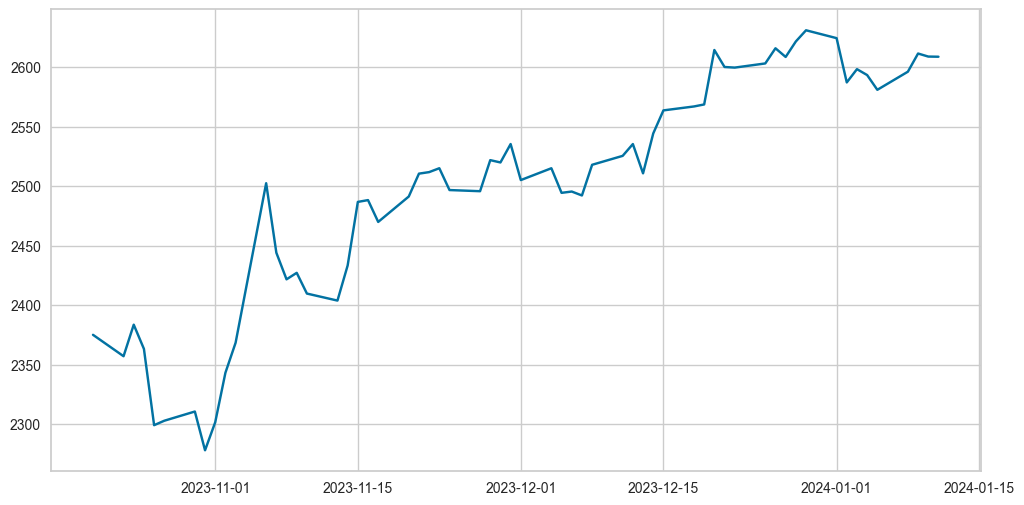

In [15]:
plt.figure(figsize=(12,6))
plt.plot(a[-60:])

In [ ]:
predict_future("055550.KS")

In [ ]:
predict_future("^VNINDEX.VN")

In [ ]:
predict_future("VCB.VN")